## Linear Regression Example 

This is a simple example to examine basic functionalities about linear regression modeling with sklearn. The considered data set is `diabetes` below. 

You can see the details from here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset



In [4]:
# Necessary packages 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Below, features and response is already separated while loading the data set

In [5]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

In [6]:
diabetes_X.shape, diabetes_y.shape

((442, 10), (442,))

We have totally, 442 observations, 10 features within X and the corresponding response array loaded as y here. For futher information on the features;

In [7]:
# Summary statistics related to features 
# Convert into data frame for simplicity
diabetes_df_train = pd.DataFrame(diabetes_X)

display(diabetes_df_train.info())

display(diabetes_df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
 1   1       442 non-null    float64
 2   2       442 non-null    float64
 3   3       442 non-null    float64
 4   4       442 non-null    float64
 5   5       442 non-null    float64
 6   6       442 non-null    float64
 7   7       442 non-null    float64
 8   8       442 non-null    float64
 9   9       442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


None

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [8]:
# Focus on one featrue only 
# Use only one feature
diabetes_X_simple = diabetes_X[:,2] # # Select 3rd column
diabetes_X_simple.shape

(442,)

In [10]:
# Splitting the data with sklearn module 
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_simple, diabetes_y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309,), (133,), (309,), (133,))

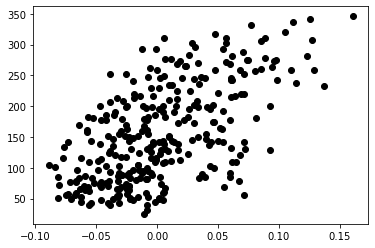

In [11]:
# Plot outputs
plt.scatter(X_train, y_train, color="black")
plt.show()

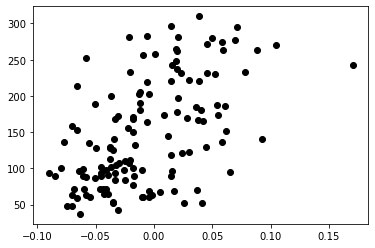

In [8]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.show()

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

# It is necessary to reshape our X_train
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(X_test)
print(diabetes_y_pred[:10])
print(y_test[:10])

[144.90793957 187.52115034 147.03860011 202.4357741  131.05864608
 126.797325   319.6221037  196.04379249  61.81217859 166.21454495]
[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]


In [12]:
print(regr.coef_)  # Model slope parameter
print(regr.intercept_) # Model intercept parameter
print(regr.score(X_test, y_test)) # Another way for R2 calculation

[988.41931249]
151.04202449316014
0.2803417492440603


In [11]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_y_pred))

Coefficients: 
 [988.41931249]
Mean squared error: 3884.94
Coefficient of determination: 0.28


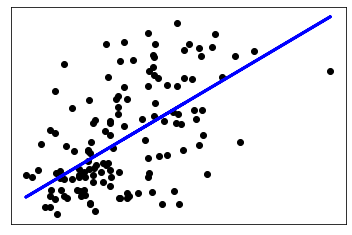

In [13]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Multiple Regression Setting 

In [14]:
diabetes_X_mult = diabetes_X # # Select 3rd column
diabetes_X_mult.shape

(442, 10)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_mult, diabetes_y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [16]:
# Create linear regression object
regr_mult = linear_model.LinearRegression()

# It is necessary to reshape our X_train
# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

# Train the model using the training sets
regr_mult.fit(X_train, y_train)

LinearRegression()

In [19]:
print(regr_mult.coef_)  # Model slope parameter
print(regr_mult.intercept_) # Model intercept parameter
print(regr_mult.score(X_test, y_test)) # Another way for R2 calculation

[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
151.00821291456543
0.4772897164322617


In [18]:
# The coefficients
print("Coefficients: \n", regr_mult.coef_)

# Predictions on multiple model
# Make predictions using the testing set
diabetes_y_pred = regr_mult.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_y_pred))

Coefficients: 
 [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
Mean squared error: 2821.75
Coefficient of determination: 0.48


### About Regularization 

Try to examine basic functionalities of Ridge and Lasso 

- Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. 

- The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent

In [20]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 15.0)

# Train the model using the training sets
reg_ridge.fit(X_train, y_train)

print(reg_ridge.coef_)  # Model slope parameter
print(reg_ridge.intercept_) # Model intercept parameter

[44.74681506]
153.7733971107221


In [21]:
# Predictions on multiple model
# Make predictions using the testing set
diabetes_y_pred = reg_ridge.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_y_pred))

Mean squared error: 5269.96
Coefficient of determination: 0.02


In [22]:
from sklearn.linear_model import Lasso
reg_lasso = Lasso(alpha = 5.0)

# Train the model using the training sets
reg_lasso.fit(X_train, y_train)

print(reg_lasso.coef_)  # Model slope parameter
print(reg_lasso.intercept_) # Model intercept parameter

[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
153.90291262135923


In [23]:
# Predictions on multiple model
# Make predictions using the testing set
diabetes_y_pred = reg_lasso.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_y_pred))

Mean squared error: 5432.89
Coefficient of determination: -0.01


### Tuning the hyper-parameters

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. 

- Typical examples include, `alpha` for `Lasso`, etc.

Two generic approaches to parameter search are provided in scikit-learn: 

- for given values, `GridSearchCV` exhaustively considers all parameter combinations, 

- while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution

For further details: https://scikit-learn.org/stable/modules/grid_search.html#

#### Exhaustive Grid Search

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter.

In [22]:
param_grid = [{'alpha': [0.5, 1.0, 5, 10, 100, 1000]} ]
param_grid

[{'alpha': [0.5, 1.0, 5, 10, 100, 1000]}]

In [23]:
models = {'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
models

{'Lasso': Lasso(), 'Ridge': Ridge()}

In [24]:
from sklearn.model_selection import GridSearchCV

fits = {'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid = param_grid).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid = param_grid).fit(X_train, y_train).best_estimator_,}
fits 

{'Lasso': Lasso(alpha=0.5), 'Ridge': Ridge(alpha=0.5)}

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold

alphas = np.linspace(0, 5, num = 100)
alphas

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [28]:
ridge_pip = make_pipeline(
                # StandardScaler(),
                Ridge()
                )

ridge_pip

Pipeline(steps=[('ridge', Ridge())])

In [29]:
# Adding the CV as well
gs = GridSearchCV(
    ridge_pip,
    param_grid = {'ridge__alpha': alphas},
    cv = KFold(5, shuffle = True, random_state = 42)
)

gs

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596...
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737374,
       3.78787879, 3.83838384, 3.88888889, 3.93939394, 3.98989899,
       4.04040404, 4.09090909, 4.14141414, 4.19191919, 4.24242424,
       4.29292929, 4.34343434, 4.39393939, 4.44444444, 4.49494949,
       4.54545455, 4.5959596 , 4.64646465, 4.6969697 , 4.74747475,
       4.7979798 , 4.84848485, 4.8989899 , 4.94949495, 5.        ])})

In [30]:
gs.fit(X_train, y_train)
print(gs.best_params_)

{'ridge__alpha': 0.050505050505050504}


## Polynomial Regression Example 

What about the case where data inherits a complex structure rather than a linear form ? Let's consider a generated data set as follows

In [31]:
m = 50
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 4 + np.random.rand(m, 1)

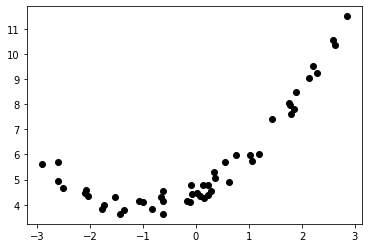

In [32]:
# Plot outputs
plt.scatter(X, y, color="black")
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 2, include_bias = False)

X_poly = poly_feat.fit_transform(X)

X[0], X_poly[0], X[0]**2

(array([2.84115754]), array([2.84115754, 8.07217616]), array([8.07217616]))

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([4.47413937]), array([[1.04307085, 0.4956855 ]]))